DataFrame shape: (7178, 2)


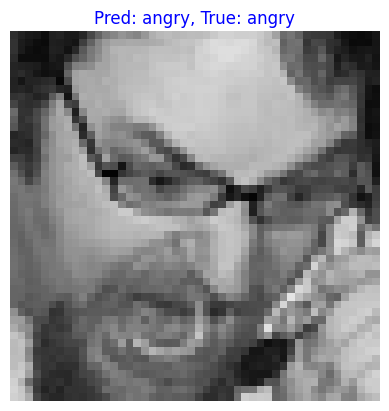

In [2]:
import os
import cv2
import torch
import pandas as pd
import numpy as np
from torchvision.transforms import Compose, Resize, ToTensor, Normalize, ToPILImage
from transformers import AutoImageProcessor, AutoModelForImageClassification
import matplotlib.pyplot as plt

# Dataset path
dataset_path = 'C:/Users/PC/Desktop/CCN_MODEL_training/Fer2013_dataset/test'

# Load the dataset
data = []
labels = []
paths = []

# Iterate through the dataset directory
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        paths.append(img_path)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        data.append(img)
        labels.append(class_name)

# Convert to DataFrame and numpy arrays
df = pd.DataFrame({'data': paths, 'label': labels})
data = np.array(data)
labels = np.array(labels)
print("DataFrame shape:", df.shape)

# Take a small subset
small_data = data[:500]
small_labels = labels[:500]

# Load the pre-trained model and processor
processor = AutoImageProcessor.from_pretrained("motheecreator/vit-Facial-Expression-Recognition")
model = AutoModelForImageClassification.from_pretrained("motheecreator/vit-Facial-Expression-Recognition")

# Get class names in the order of appearance
class_names = list(dict.fromkeys(labels))  # Preserve original order without sorting
label_to_index = {name: idx for idx, name in enumerate(class_names)}
numerical_labels = [label_to_index[label] for label in small_labels]

# Preprocessing images
transform = Compose([
    ToPILImage(),                           # Convert NumPy array to PIL Image
    Resize((224, 224)),                     # Resize to match model input
    ToTensor(),                             # Convert to PyTorch Tensor
    Normalize(mean=processor.image_mean,    # Normalize using processor values
              std=processor.image_std)
])

processed_data = torch.stack([transform(image) for image in small_data])

# Inference
model.eval()
with torch.no_grad():
    predictions = model(processed_data).logits
    predicted_labels = torch.argmax(predictions, dim=1).numpy()

# Plotting function
def plot_image(i, predictions, true_labels, images, class_names):
    pred_label = predictions[i]
    true_label = true_labels[i]
    image = images[i]

    # Determine color based on correctness
    color = 'blue' if pred_label == true_label else 'red'

    # Display the image
    plt.imshow(image)
    plt.title(f"Pred: {class_names[pred_label]}, True: {class_names[true_label]}", color=color)
    plt.axis('off')

# Plot example
i = 0  # Index of the image to visualize
plot_image(i, predicted_labels, numerical_labels, small_data, class_names)
plt.show()


In [ ]:
! pip show tensorflow keras


In [ ]:
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import Sequential  # Ensure Sequential is accessible
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the JSON file
with open("C:/Users/PC/Desktop/CCN_MODEL_training/webcam_test/Facial Expression Recognition.json", "r") as json_file:
    model_json = json_file.read()

# Use a custom_objects dictionary to register Sequential
model = model_from_json(model_json, custom_objects={"Sequential": Sequential})

model.load_weights('C:/Users/PC/Desktop/CCN_MODEL_training/webcam_test/fer.h5')


print("Model loaded successfully")


In [3]:

face_haar_cascade = cv2.CascadeClassifier('C:/Users/PC/Desktop/CCN_MODEL_training/webcam_test/haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture("C:/Users/PC/Desktop/CCN_MODEL_training/webcam_test/Emotions.mp4")

emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')

try:
    while True:
        ret, test_img = cap.read()
        if not ret:
            print("Error capturing frame")
            continue
        
        gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
        faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)

        for (x, y, w, h) in faces_detected:
            cv2.rectangle(test_img, (x, y), (x + w, y + h), (255, 0, 0), thickness=7)
            roi_gray = gray_img[y:y + w, x:x + h]
            roi_gray = cv2.resize(roi_gray, (48, 48))
            
            img_pixels = image.img_to_array(roi_gray)
            img_pixels = np.expand_dims(img_pixels, axis=0)
            img_pixels /= 255
            
            try:
                predictions = model.predict(img_pixels)
                max_index = np.argmax(predictions[0])
                predicted_emotion = emotions[max_index]
            except Exception as e:
                print(f"Error during prediction: {e}")
                predicted_emotion = "Unknown"

            cv2.putText(test_img, predicted_emotion, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        resized_img = cv2.resize(test_img, (1300, 800))
        cv2.imshow('Facial Emotion Analysis', resized_img)

        key = cv2.waitKey(10)
        if key & 0xFF == ord('q'):
            break
except Exception as e:
    print(f"An error occurred: {e}")
finally:
    cap.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)


An error occurred: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'



error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


In [2]:
import cv2
from keras.preprocessing import image
import numpy as np

# Load the face detection model
face_haar_cascade = cv2.CascadeClassifier('C:/Users/PC/Desktop/CCN_MODEL_training/webcam_test/haarcascade_frontalface_default.xml')

# Load the video file
cap = cv2.VideoCapture("C:/Users/PC/Desktop/CCN_MODEL_training/webcam_test/Emotions.mp4")

# Define the emotions
emotions = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')

fps = cap.get(cv2.CAP_PROP_FPS)

speed_factor = 3
frame_interval = int(fps / speed_factor)

try:
    while True:
        ret, test_img = cap.read()
        if not ret:
            print("Error capturing frame")
            break

    
        current_frame = int(cap.get(cv2.CAP_PROP_POS_FRAMES))
        if current_frame % frame_interval != 0:
            continue

        gray_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
        faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)

        for (x, y, w, h) in faces_detected:
            cv2.rectangle(test_img, (x, y), (x + w, y + h), (255, 0, 0), thickness=7)
            roi_gray = gray_img[y:y + w, x:x + h]
            roi_gray = cv2.resize(roi_gray, (48, 48))
            
            img_pixels = image.img_to_array(roi_gray)
            img_pixels = np.expand_dims(img_pixels, axis=0)
            img_pixels /= 255
            
            try:
                predictions = model.predict(img_pixels)
                max_index = np.argmax(predictions[0])
                predicted_emotion = emotions[max_index]
            except Exception as e:
                print(f"Error during prediction: {e}")
                predicted_emotion = "Unknown"

            cv2.putText(test_img, predicted_emotion, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        resized_img = cv2.resize(test_img, (1600, 750))
        cv2.imshow('Facial Emotion Analysis', resized_img)


        # Exit the loop if 'q' is pressed
        key = cv2.waitKey(10)
        if key & 0xFF == ord('q'):
            break

except Exception as e:
    print(f"An error occurred: {e}")

finally:
    cap.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)


An error occurred: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'



error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'
